In [1]:
from __future__ import print_function

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

import astropy.units as units
from astropy.coordinates import SkyCoord
from astropy.coordinates import Angle
from astroquery.irsa_dust import IrsaDust

import healpy as hp
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from dustmaps.sfd import SFDQuery
from dustmaps.planck import PlanckQuery
from dustmaps.bayestar import BayestarQuery




In [2]:
import os

In [3]:

os.listdir("/Users/pbrown/Desktop/SN/github/ebv_tools/")
ebv_map = hp.read_map('/Users/pbrown/Desktop/SN/github/ebv_tools/ebv_lhd.hpx.fits', verbose=False)
nside = hp.get_nside(ebv_map)
npix = hp.nside2npix(nside)
ordering = 'ring'



In [4]:
name='M101'
coord = SkyCoord.from_name(name, frame = 'icrs')
s_gal = coord.galactic
glon = s_gal.l.value
glat = s_gal.b.value
# get pixel numbers
galpix = hp.ang2pix(nside, glon, glat, lonlat=True)
print(galpix)
# get reddening for these pixels
ebv_los = ebv_map[galpix]
print(ebv_los)


2170448
nan


In [5]:
imagename=name+'_4comparison.png'
ra0 = coord.ra
dec0 = coord.dec


In [6]:
ra = np.arange(ra0.degree - 2., ra0.degree + 2., 0.05)
dec = np.arange(dec0.degree - 2., dec0.degree + 2., 0.05)

ragrid, decgrid = np.meshgrid(ra, dec)
coords = SkyCoord(ragrid*units.deg, decgrid*units.deg, frame='icrs')

sfd = SFDQuery()
# this conversion puts Av on the Schlafly system
Av_sfd = 2.742 * sfd(coords)

planck = PlanckQuery()
Av_planck = 3.1 * planck(coords)


In [7]:

coords = SkyCoord(ragrid*units.deg, decgrid*units.deg,
                  distance=1000000.*units.kpc, frame='galactic')
bayestar = BayestarQuery(max_samples=1)
Av_bayestar = 2.742 * bayestar(coords)
print('done with Bayestar')

Av_HI=0*Av_sfd

Loading pixel_info ...
Loading samples ...
Loading best_fit ...
Replacing NaNs in reliable distance estimates ...
Sorting pixel_info ...
Extracting hp_idx_sorted and data_idx at each nside ...
  nside = 64
  nside = 128
  nside = 256
  nside = 512
  nside = 1024
t = 142.359 s
  pix_info:   7.368 s
   samples:  66.852 s
      best:  47.193 s
       nan:   7.990 s
      sort:  12.011 s
       idx:   0.944 s
done with Bayestar


In [8]:
maxboth=max(np.amax(Av_planck),np.amax(Av_sfd))
print(maxboth)

0.8336607903242111


In [9]:
print(np.shape(Av_HI))

(80, 80)


In [10]:
nside = hp.get_nside(ebv_map)

npix = hp.nside2npix(nside)
ordering = 'ring'
s_gal = coords.galactic

glon = s_gal.l.value
glat = s_gal.b.value
# get pixel numbers
pix = hp.ang2pix(nside, glon, glat, lonlat=True)
#print(pix)
# get reddening for these pixels
ebv_los = ebv_map[pix]
for i in range(len(dec)-1):
    for j in range(len(ra)-1):
        stepcoord = SkyCoord(ra[i]*units.deg, dec[j]*units.deg, frame='icrs')
        print(stepcoord)
        stepgal = stepcoord.galactic
        steplon = stepgal.l.value
        steplat = stepgal.b.value
        # get pixel numbers
        steppix = hp.ang2pix(nside, steplon, steplat, lonlat=True)
        print(steppix)
        ebv=ebv_map[steppix]
        Av_HI[j,i]=ebv*2.742
    #print(ebv)
#AV_HI=2.742*ebv_los
#print('done with AV_HI')

<SkyCoord (ICRS): (ra, dec) in deg
    (146.88822109, 67.0652947)>
2133616
<SkyCoord (ICRS): (ra, dec) in deg
    (146.88822109, 67.1152947)>
2137711
<SkyCoord (ICRS): (ra, dec) in deg
    (146.88822109, 67.1652947)>
2137710
<SkyCoord (ICRS): (ra, dec) in deg
    (146.88822109, 67.2152947)>
2137710
<SkyCoord (ICRS): (ra, dec) in deg
    (146.88822109, 67.2652947)>
2137709
<SkyCoord (ICRS): (ra, dec) in deg
    (146.88822109, 67.3152947)>
2141805
<SkyCoord (ICRS): (ra, dec) in deg
    (146.88822109, 67.3652947)>
2145900
<SkyCoord (ICRS): (ra, dec) in deg
    (146.88822109, 67.4152947)>
2145899
<SkyCoord (ICRS): (ra, dec) in deg
    (146.88822109, 67.4652947)>
2149995
<SkyCoord (ICRS): (ra, dec) in deg
    (146.88822109, 67.5152947)>
2154090
<SkyCoord (ICRS): (ra, dec) in deg
    (146.88822109, 67.5652947)>
2154089
<SkyCoord (ICRS): (ra, dec) in deg
    (146.88822109, 67.6152947)>
2158185
<SkyCoord (ICRS): (ra, dec) in deg
    (146.88822109, 67.6652947)>
2158184
<SkyCoord (ICRS): (ra, de

<SkyCoord (ICRS): (ra, dec) in deg
    (146.93822109, 68.8152947)>
2207322
<SkyCoord (ICRS): (ra, dec) in deg
    (146.93822109, 68.8652947)>
2207321
<SkyCoord (ICRS): (ra, dec) in deg
    (146.93822109, 68.9152947)>
2211416
<SkyCoord (ICRS): (ra, dec) in deg
    (146.93822109, 68.9652947)>
2215512
<SkyCoord (ICRS): (ra, dec) in deg
    (146.93822109, 69.0152947)>
2215511
<SkyCoord (ICRS): (ra, dec) in deg
    (146.93822109, 69.0652947)>
2219606
<SkyCoord (ICRS): (ra, dec) in deg
    (146.93822109, 69.1152947)>
2223702
<SkyCoord (ICRS): (ra, dec) in deg
    (146.93822109, 69.1652947)>
2223701
<SkyCoord (ICRS): (ra, dec) in deg
    (146.93822109, 69.2152947)>
2227796
<SkyCoord (ICRS): (ra, dec) in deg
    (146.93822109, 69.2652947)>
2231892
<SkyCoord (ICRS): (ra, dec) in deg
    (146.93822109, 69.3152947)>
2231891
<SkyCoord (ICRS): (ra, dec) in deg
    (146.93822109, 69.3652947)>
2231891
<SkyCoord (ICRS): (ra, dec) in deg
    (146.93822109, 69.4152947)>
2235986
<SkyCoord (ICRS): (ra, de

<SkyCoord (ICRS): (ra, dec) in deg
    (147.03822109, 67.3652947)>
2141804
<SkyCoord (ICRS): (ra, dec) in deg
    (147.03822109, 67.4152947)>
2141803
<SkyCoord (ICRS): (ra, dec) in deg
    (147.03822109, 67.4652947)>
2145898
<SkyCoord (ICRS): (ra, dec) in deg
    (147.03822109, 67.5152947)>
2149994
<SkyCoord (ICRS): (ra, dec) in deg
    (147.03822109, 67.5652947)>
2149993
<SkyCoord (ICRS): (ra, dec) in deg
    (147.03822109, 67.6152947)>
2154088
<SkyCoord (ICRS): (ra, dec) in deg
    (147.03822109, 67.6652947)>
2158184
<SkyCoord (ICRS): (ra, dec) in deg
    (147.03822109, 67.7152947)>
2158183
<SkyCoord (ICRS): (ra, dec) in deg
    (147.03822109, 67.7652947)>
2158183
<SkyCoord (ICRS): (ra, dec) in deg
    (147.03822109, 67.8152947)>
2158182
<SkyCoord (ICRS): (ra, dec) in deg
    (147.03822109, 67.8652947)>
2162277
<SkyCoord (ICRS): (ra, dec) in deg
    (147.03822109, 67.9152947)>
2166373
<SkyCoord (ICRS): (ra, dec) in deg
    (147.03822109, 67.9652947)>
2166372
<SkyCoord (ICRS): (ra, de

2240079
<SkyCoord (ICRS): (ra, dec) in deg
    (147.08822109, 69.6652947)>
2244174
<SkyCoord (ICRS): (ra, dec) in deg
    (147.08822109, 69.7152947)>
2248270
<SkyCoord (ICRS): (ra, dec) in deg
    (147.08822109, 69.7652947)>
2248269
<SkyCoord (ICRS): (ra, dec) in deg
    (147.08822109, 69.8152947)>
2252364
<SkyCoord (ICRS): (ra, dec) in deg
    (147.08822109, 69.8652947)>
2252364
<SkyCoord (ICRS): (ra, dec) in deg
    (147.08822109, 69.9152947)>
2252363
<SkyCoord (ICRS): (ra, dec) in deg
    (147.08822109, 69.9652947)>
2256459
<SkyCoord (ICRS): (ra, dec) in deg
    (147.08822109, 70.0152947)>
2260554
<SkyCoord (ICRS): (ra, dec) in deg
    (147.08822109, 70.0652947)>
2260553
<SkyCoord (ICRS): (ra, dec) in deg
    (147.08822109, 70.1152947)>
2264649
<SkyCoord (ICRS): (ra, dec) in deg
    (147.08822109, 70.1652947)>
2268744
<SkyCoord (ICRS): (ra, dec) in deg
    (147.08822109, 70.2152947)>
2268743
<SkyCoord (ICRS): (ra, dec) in deg
    (147.08822109, 70.2652947)>
2272839
<SkyCoord (ICRS):

<SkyCoord (ICRS): (ra, dec) in deg
    (147.18822109, 68.0152947)>
2166371
<SkyCoord (ICRS): (ra, dec) in deg
    (147.18822109, 68.0652947)>
2170466
<SkyCoord (ICRS): (ra, dec) in deg
    (147.18822109, 68.1152947)>
2170465
<SkyCoord (ICRS): (ra, dec) in deg
    (147.18822109, 68.1652947)>
2174561
<SkyCoord (ICRS): (ra, dec) in deg
    (147.18822109, 68.2152947)>
2178656
<SkyCoord (ICRS): (ra, dec) in deg
    (147.18822109, 68.2652947)>
2174560
<SkyCoord (ICRS): (ra, dec) in deg
    (147.18822109, 68.3152947)>
2178655
<SkyCoord (ICRS): (ra, dec) in deg
    (147.18822109, 68.3652947)>
2178654
<SkyCoord (ICRS): (ra, dec) in deg
    (147.18822109, 68.4152947)>
2182750
<SkyCoord (ICRS): (ra, dec) in deg
    (147.18822109, 68.4652947)>
2186845
<SkyCoord (ICRS): (ra, dec) in deg
    (147.18822109, 68.5152947)>
2186844
<SkyCoord (ICRS): (ra, dec) in deg
    (147.18822109, 68.5652947)>
2190940
<SkyCoord (ICRS): (ra, dec) in deg
    (147.18822109, 68.6152947)>
2195035
<SkyCoord (ICRS): (ra, de

2285122
<SkyCoord (ICRS): (ra, dec) in deg
    (147.23822109, 70.6652947)>
2289218
<SkyCoord (ICRS): (ra, dec) in deg
    (147.23822109, 70.7152947)>
2289217
<SkyCoord (ICRS): (ra, dec) in deg
    (147.23822109, 70.7652947)>
2293312
<SkyCoord (ICRS): (ra, dec) in deg
    (147.23822109, 70.8152947)>
2297408
<SkyCoord (ICRS): (ra, dec) in deg
    (147.23822109, 70.8652947)>
2293311
<SkyCoord (ICRS): (ra, dec) in deg
    (147.23822109, 70.9152947)>
2297407
<SkyCoord (ICRS): (ra, dec) in deg
    (147.23822109, 70.9652947)>
2301502
<SkyCoord (ICRS): (ra, dec) in deg
    (147.28822109, 67.0652947)>
2121326
<SkyCoord (ICRS): (ra, dec) in deg
    (147.28822109, 67.1152947)>
2125422
<SkyCoord (ICRS): (ra, dec) in deg
    (147.28822109, 67.1652947)>
2125422
<SkyCoord (ICRS): (ra, dec) in deg
    (147.28822109, 67.2152947)>
2125421
<SkyCoord (ICRS): (ra, dec) in deg
    (147.28822109, 67.2652947)>
2129516
<SkyCoord (ICRS): (ra, dec) in deg
    (147.28822109, 67.3152947)>
2133612
<SkyCoord (ICRS):

<SkyCoord (ICRS): (ra, dec) in deg
    (147.33822109, 68.8152947)>
2195032
<SkyCoord (ICRS): (ra, dec) in deg
    (147.33822109, 68.8652947)>
2199128
<SkyCoord (ICRS): (ra, dec) in deg
    (147.33822109, 68.9152947)>
2203223
<SkyCoord (ICRS): (ra, dec) in deg
    (147.33822109, 68.9652947)>
2203222
<SkyCoord (ICRS): (ra, dec) in deg
    (147.33822109, 69.0152947)>
2207318
<SkyCoord (ICRS): (ra, dec) in deg
    (147.33822109, 69.0652947)>
2211413
<SkyCoord (ICRS): (ra, dec) in deg
    (147.33822109, 69.1152947)>
2211412
<SkyCoord (ICRS): (ra, dec) in deg
    (147.33822109, 69.1652947)>
2215508
<SkyCoord (ICRS): (ra, dec) in deg
    (147.33822109, 69.2152947)>
2219603
<SkyCoord (ICRS): (ra, dec) in deg
    (147.33822109, 69.2652947)>
2219602
<SkyCoord (ICRS): (ra, dec) in deg
    (147.33822109, 69.3152947)>
2219602
<SkyCoord (ICRS): (ra, dec) in deg
    (147.33822109, 69.3652947)>
2223698
<SkyCoord (ICRS): (ra, dec) in deg
    (147.33822109, 69.4152947)>
2223697
<SkyCoord (ICRS): (ra, de

    (147.38822109, 70.9152947)>
2293310
<SkyCoord (ICRS): (ra, dec) in deg
    (147.38822109, 70.9652947)>
2297406
<SkyCoord (ICRS): (ra, dec) in deg
    (147.43822109, 67.0652947)>
2117230
<SkyCoord (ICRS): (ra, dec) in deg
    (147.43822109, 67.1152947)>
2121325
<SkyCoord (ICRS): (ra, dec) in deg
    (147.43822109, 67.1652947)>
2121325
<SkyCoord (ICRS): (ra, dec) in deg
    (147.43822109, 67.2152947)>
2121324
<SkyCoord (ICRS): (ra, dec) in deg
    (147.43822109, 67.2652947)>
2125420
<SkyCoord (ICRS): (ra, dec) in deg
    (147.43822109, 67.3152947)>
2129515
<SkyCoord (ICRS): (ra, dec) in deg
    (147.43822109, 67.3652947)>
2129514
<SkyCoord (ICRS): (ra, dec) in deg
    (147.43822109, 67.4152947)>
2133610
<SkyCoord (ICRS): (ra, dec) in deg
    (147.43822109, 67.4652947)>
2133609
<SkyCoord (ICRS): (ra, dec) in deg
    (147.43822109, 67.5152947)>
2137704
<SkyCoord (ICRS): (ra, dec) in deg
    (147.43822109, 67.5652947)>
2141800
<SkyCoord (ICRS): (ra, dec) in deg
    (147.43822109, 67.615

2207316
<SkyCoord (ICRS): (ra, dec) in deg
    (147.48822109, 69.1652947)>
2211411
<SkyCoord (ICRS): (ra, dec) in deg
    (147.48822109, 69.2152947)>
2215507
<SkyCoord (ICRS): (ra, dec) in deg
    (147.48822109, 69.2652947)>
2215506
<SkyCoord (ICRS): (ra, dec) in deg
    (147.48822109, 69.3152947)>
2215506
<SkyCoord (ICRS): (ra, dec) in deg
    (147.48822109, 69.3652947)>
2219601
<SkyCoord (ICRS): (ra, dec) in deg
    (147.48822109, 69.4152947)>
2219600
<SkyCoord (ICRS): (ra, dec) in deg
    (147.48822109, 69.4652947)>
2223696
<SkyCoord (ICRS): (ra, dec) in deg
    (147.48822109, 69.5152947)>
2227791
<SkyCoord (ICRS): (ra, dec) in deg
    (147.48822109, 69.5652947)>
2227790
<SkyCoord (ICRS): (ra, dec) in deg
    (147.48822109, 69.6152947)>
2231886
<SkyCoord (ICRS): (ra, dec) in deg
    (147.48822109, 69.6652947)>
2235981
<SkyCoord (ICRS): (ra, dec) in deg
    (147.48822109, 69.7152947)>
2235980
<SkyCoord (ICRS): (ra, dec) in deg
    (147.48822109, 69.7652947)>
2240076
<SkyCoord (ICRS):

2281025
<SkyCoord (ICRS): (ra, dec) in deg
    (147.53822109, 70.7152947)>
2285120
<SkyCoord (ICRS): (ra, dec) in deg
    (147.53822109, 70.7652947)>
2285119
<SkyCoord (ICRS): (ra, dec) in deg
    (147.53822109, 70.8152947)>
2289215
<SkyCoord (ICRS): (ra, dec) in deg
    (147.53822109, 70.8652947)>
2289215
<SkyCoord (ICRS): (ra, dec) in deg
    (147.53822109, 70.9152947)>
2293310
<SkyCoord (ICRS): (ra, dec) in deg
    (147.53822109, 70.9652947)>
2293309
<SkyCoord (ICRS): (ra, dec) in deg
    (147.58822109, 67.0652947)>
2113133
<SkyCoord (ICRS): (ra, dec) in deg
    (147.58822109, 67.1152947)>
2117229
<SkyCoord (ICRS): (ra, dec) in deg
    (147.58822109, 67.1652947)>
2117229
<SkyCoord (ICRS): (ra, dec) in deg
    (147.58822109, 67.2152947)>
2117228
<SkyCoord (ICRS): (ra, dec) in deg
    (147.58822109, 67.2652947)>
2121323
<SkyCoord (ICRS): (ra, dec) in deg
    (147.58822109, 67.3152947)>
2125419
<SkyCoord (ICRS): (ra, dec) in deg
    (147.58822109, 67.3652947)>
2125418
<SkyCoord (ICRS):

2170460
<SkyCoord (ICRS): (ra, dec) in deg
    (147.63822109, 68.4652947)>
2174556
<SkyCoord (ICRS): (ra, dec) in deg
    (147.63822109, 68.5152947)>
2178651
<SkyCoord (ICRS): (ra, dec) in deg
    (147.63822109, 68.5652947)>
2178650
<SkyCoord (ICRS): (ra, dec) in deg
    (147.63822109, 68.6152947)>
2182746
<SkyCoord (ICRS): (ra, dec) in deg
    (147.63822109, 68.6652947)>
2186841
<SkyCoord (ICRS): (ra, dec) in deg
    (147.63822109, 68.7152947)>
2186840
<SkyCoord (ICRS): (ra, dec) in deg
    (147.63822109, 68.7652947)>
2186840
<SkyCoord (ICRS): (ra, dec) in deg
    (147.63822109, 68.8152947)>
2190936
<SkyCoord (ICRS): (ra, dec) in deg
    (147.63822109, 68.8652947)>
2190935
<SkyCoord (ICRS): (ra, dec) in deg
    (147.63822109, 68.9152947)>
2195030
<SkyCoord (ICRS): (ra, dec) in deg
    (147.63822109, 68.9652947)>
2199126
<SkyCoord (ICRS): (ra, dec) in deg
    (147.63822109, 69.0152947)>
2199125
<SkyCoord (ICRS): (ra, dec) in deg
    (147.63822109, 69.0652947)>
2203220
<SkyCoord (ICRS):

2260548
<SkyCoord (ICRS): (ra, dec) in deg
    (147.68822109, 70.3652947)>
2260548
<SkyCoord (ICRS): (ra, dec) in deg
    (147.68822109, 70.4152947)>
2264644
<SkyCoord (ICRS): (ra, dec) in deg
    (147.68822109, 70.4652947)>
2264643
<SkyCoord (ICRS): (ra, dec) in deg
    (147.68822109, 70.5152947)>
2268738
<SkyCoord (ICRS): (ra, dec) in deg
    (147.68822109, 70.5652947)>
2272834
<SkyCoord (ICRS): (ra, dec) in deg
    (147.68822109, 70.6152947)>
2276929
<SkyCoord (ICRS): (ra, dec) in deg
    (147.68822109, 70.6652947)>
2276928
<SkyCoord (ICRS): (ra, dec) in deg
    (147.68822109, 70.7152947)>
2281024
<SkyCoord (ICRS): (ra, dec) in deg
    (147.68822109, 70.7652947)>
2285119
<SkyCoord (ICRS): (ra, dec) in deg
    (147.68822109, 70.8152947)>
2285118
<SkyCoord (ICRS): (ra, dec) in deg
    (147.68822109, 70.8652947)>
2285118
<SkyCoord (ICRS): (ra, dec) in deg
    (147.68822109, 70.9152947)>
2289214
<SkyCoord (ICRS): (ra, dec) in deg
    (147.68822109, 70.9652947)>
2289213
<SkyCoord (ICRS):

2158176
<SkyCoord (ICRS): (ra, dec) in deg
    (147.78822109, 68.1652947)>
2158175
<SkyCoord (ICRS): (ra, dec) in deg
    (147.78822109, 68.2152947)>
2158175
<SkyCoord (ICRS): (ra, dec) in deg
    (147.78822109, 68.2652947)>
2158174
<SkyCoord (ICRS): (ra, dec) in deg
    (147.78822109, 68.3152947)>
2162269
<SkyCoord (ICRS): (ra, dec) in deg
    (147.78822109, 68.3652947)>
2166365
<SkyCoord (ICRS): (ra, dec) in deg
    (147.78822109, 68.4152947)>
2166364
<SkyCoord (ICRS): (ra, dec) in deg
    (147.78822109, 68.4652947)>
2170459
<SkyCoord (ICRS): (ra, dec) in deg
    (147.78822109, 68.5152947)>
2174555
<SkyCoord (ICRS): (ra, dec) in deg
    (147.78822109, 68.5652947)>
2174554
<SkyCoord (ICRS): (ra, dec) in deg
    (147.78822109, 68.6152947)>
2178649
<SkyCoord (ICRS): (ra, dec) in deg
    (147.78822109, 68.6652947)>
2182745
<SkyCoord (ICRS): (ra, dec) in deg
    (147.78822109, 68.7152947)>
2182744
<SkyCoord (ICRS): (ra, dec) in deg
    (147.78822109, 68.7652947)>
2182744
<SkyCoord (ICRS):

<SkyCoord (ICRS): (ra, dec) in deg
    (147.83822109, 70.2652947)>
2256453
<SkyCoord (ICRS): (ra, dec) in deg
    (147.83822109, 70.3152947)>
2260548
<SkyCoord (ICRS): (ra, dec) in deg
    (147.83822109, 70.3652947)>
2256452
<SkyCoord (ICRS): (ra, dec) in deg
    (147.83822109, 70.4152947)>
2260547
<SkyCoord (ICRS): (ra, dec) in deg
    (147.83822109, 70.4652947)>
2264643
<SkyCoord (ICRS): (ra, dec) in deg
    (147.83822109, 70.5152947)>
2264642
<SkyCoord (ICRS): (ra, dec) in deg
    (147.83822109, 70.5652947)>
2268737
<SkyCoord (ICRS): (ra, dec) in deg
    (147.83822109, 70.6152947)>
2272833
<SkyCoord (ICRS): (ra, dec) in deg
    (147.83822109, 70.6652947)>
2272832
<SkyCoord (ICRS): (ra, dec) in deg
    (147.83822109, 70.7152947)>
2276927
<SkyCoord (ICRS): (ra, dec) in deg
    (147.83822109, 70.7652947)>
2281023
<SkyCoord (ICRS): (ra, dec) in deg
    (147.83822109, 70.8152947)>
2281022
<SkyCoord (ICRS): (ra, dec) in deg
    (147.83822109, 70.8652947)>
2281022
<SkyCoord (ICRS): (ra, de

2145888
<SkyCoord (ICRS): (ra, dec) in deg
    (147.93822109, 68.0652947)>
2149984
<SkyCoord (ICRS): (ra, dec) in deg
    (147.93822109, 68.1152947)>
2154079
<SkyCoord (ICRS): (ra, dec) in deg
    (147.93822109, 68.1652947)>
2154078
<SkyCoord (ICRS): (ra, dec) in deg
    (147.93822109, 68.2152947)>
2154078
<SkyCoord (ICRS): (ra, dec) in deg
    (147.93822109, 68.2652947)>
2158174
<SkyCoord (ICRS): (ra, dec) in deg
    (147.93822109, 68.3152947)>
2158173
<SkyCoord (ICRS): (ra, dec) in deg
    (147.93822109, 68.3652947)>
2162268
<SkyCoord (ICRS): (ra, dec) in deg
    (147.93822109, 68.4152947)>
2166364
<SkyCoord (ICRS): (ra, dec) in deg
    (147.93822109, 68.4652947)>
2166363
<SkyCoord (ICRS): (ra, dec) in deg
    (147.93822109, 68.5152947)>
2170458
<SkyCoord (ICRS): (ra, dec) in deg
    (147.93822109, 68.5652947)>
2170457
<SkyCoord (ICRS): (ra, dec) in deg
    (147.93822109, 68.6152947)>
2174553
<SkyCoord (ICRS): (ra, dec) in deg
    (147.93822109, 68.6652947)>
2178648
<SkyCoord (ICRS):

2272831
<SkyCoord (ICRS): (ra, dec) in deg
    (147.98822109, 70.7652947)>
2276926
<SkyCoord (ICRS): (ra, dec) in deg
    (147.98822109, 70.8152947)>
2281022
<SkyCoord (ICRS): (ra, dec) in deg
    (147.98822109, 70.8652947)>
2276925
<SkyCoord (ICRS): (ra, dec) in deg
    (147.98822109, 70.9152947)>
2281021
<SkyCoord (ICRS): (ra, dec) in deg
    (147.98822109, 70.9652947)>
2285116
<SkyCoord (ICRS): (ra, dec) in deg
    (148.03822109, 67.0652947)>
2104940
<SkyCoord (ICRS): (ra, dec) in deg
    (148.03822109, 67.1152947)>
2100844
<SkyCoord (ICRS): (ra, dec) in deg
    (148.03822109, 67.1652947)>
2104939
<SkyCoord (ICRS): (ra, dec) in deg
    (148.03822109, 67.2152947)>
2104938
<SkyCoord (ICRS): (ra, dec) in deg
    (148.03822109, 67.2652947)>
2109034
<SkyCoord (ICRS): (ra, dec) in deg
    (148.03822109, 67.3152947)>
2113129
<SkyCoord (ICRS): (ra, dec) in deg
    (148.03822109, 67.3652947)>
2113128
<SkyCoord (ICRS): (ra, dec) in deg
    (148.03822109, 67.4152947)>
2117224
<SkyCoord (ICRS):

2207311
<SkyCoord (ICRS): (ra, dec) in deg
    (148.08822109, 69.4652947)>
2211406
<SkyCoord (ICRS): (ra, dec) in deg
    (148.08822109, 69.5152947)>
2211405
<SkyCoord (ICRS): (ra, dec) in deg
    (148.08822109, 69.5652947)>
2215501
<SkyCoord (ICRS): (ra, dec) in deg
    (148.08822109, 69.6152947)>
2219596
<SkyCoord (ICRS): (ra, dec) in deg
    (148.08822109, 69.6652947)>
2219595
<SkyCoord (ICRS): (ra, dec) in deg
    (148.08822109, 69.7152947)>
2223691
<SkyCoord (ICRS): (ra, dec) in deg
    (148.08822109, 69.7652947)>
2227786
<SkyCoord (ICRS): (ra, dec) in deg
    (148.08822109, 69.8152947)>
2223690
<SkyCoord (ICRS): (ra, dec) in deg
    (148.08822109, 69.8652947)>
2227785
<SkyCoord (ICRS): (ra, dec) in deg
    (148.08822109, 69.9152947)>
2231881
<SkyCoord (ICRS): (ra, dec) in deg
    (148.08822109, 69.9652947)>
2231880
<SkyCoord (ICRS): (ra, dec) in deg
    (148.08822109, 70.0152947)>
2235975
<SkyCoord (ICRS): (ra, dec) in deg
    (148.08822109, 70.0652947)>
2240071
<SkyCoord (ICRS):

<SkyCoord (ICRS): (ra, dec) in deg
    (148.18822109, 68.1152947)>
2145886
<SkyCoord (ICRS): (ra, dec) in deg
    (148.18822109, 68.1652947)>
2149982
<SkyCoord (ICRS): (ra, dec) in deg
    (148.18822109, 68.2152947)>
2145885
<SkyCoord (ICRS): (ra, dec) in deg
    (148.18822109, 68.2652947)>
2149981
<SkyCoord (ICRS): (ra, dec) in deg
    (148.18822109, 68.3152947)>
2154076
<SkyCoord (ICRS): (ra, dec) in deg
    (148.18822109, 68.3652947)>
2154075
<SkyCoord (ICRS): (ra, dec) in deg
    (148.18822109, 68.4152947)>
2158171
<SkyCoord (ICRS): (ra, dec) in deg
    (148.18822109, 68.4652947)>
2162266
<SkyCoord (ICRS): (ra, dec) in deg
    (148.18822109, 68.5152947)>
2162265
<SkyCoord (ICRS): (ra, dec) in deg
    (148.18822109, 68.5652947)>
2166361
<SkyCoord (ICRS): (ra, dec) in deg
    (148.18822109, 68.6152947)>
2170456
<SkyCoord (ICRS): (ra, dec) in deg
    (148.18822109, 68.6652947)>
2170455
<SkyCoord (ICRS): (ra, dec) in deg
    (148.18822109, 68.7152947)>
2174551
<SkyCoord (ICRS): (ra, de

    (148.23822109, 70.4152947)>
2252354
<SkyCoord (ICRS): (ra, dec) in deg
    (148.23822109, 70.4652947)>
2252353
<SkyCoord (ICRS): (ra, dec) in deg
    (148.23822109, 70.5152947)>
2256449
<SkyCoord (ICRS): (ra, dec) in deg
    (148.23822109, 70.5652947)>
2260544
<SkyCoord (ICRS): (ra, dec) in deg
    (148.23822109, 70.6152947)>
2260543
<SkyCoord (ICRS): (ra, dec) in deg
    (148.23822109, 70.6652947)>
2264639
<SkyCoord (ICRS): (ra, dec) in deg
    (148.23822109, 70.7152947)>
2268734
<SkyCoord (ICRS): (ra, dec) in deg
    (148.23822109, 70.7652947)>
2272830
<SkyCoord (ICRS): (ra, dec) in deg
    (148.23822109, 70.8152947)>
2272829
<SkyCoord (ICRS): (ra, dec) in deg
    (148.23822109, 70.8652947)>
2272829
<SkyCoord (ICRS): (ra, dec) in deg
    (148.23822109, 70.9152947)>
2276924
<SkyCoord (ICRS): (ra, dec) in deg
    (148.23822109, 70.9652947)>
2276923
<SkyCoord (ICRS): (ra, dec) in deg
    (148.28822109, 67.0652947)>
2096747
<SkyCoord (ICRS): (ra, dec) in deg
    (148.28822109, 67.115

    (148.33822109, 69.3652947)>
2199119
<SkyCoord (ICRS): (ra, dec) in deg
    (148.33822109, 69.4152947)>
2199118
<SkyCoord (ICRS): (ra, dec) in deg
    (148.33822109, 69.4652947)>
2203213
<SkyCoord (ICRS): (ra, dec) in deg
    (148.33822109, 69.5152947)>
2207309
<SkyCoord (ICRS): (ra, dec) in deg
    (148.33822109, 69.5652947)>
2207308
<SkyCoord (ICRS): (ra, dec) in deg
    (148.33822109, 69.6152947)>
2211403
<SkyCoord (ICRS): (ra, dec) in deg
    (148.33822109, 69.6652947)>
2215499
<SkyCoord (ICRS): (ra, dec) in deg
    (148.33822109, 69.7152947)>
2215498
<SkyCoord (ICRS): (ra, dec) in deg
    (148.33822109, 69.7652947)>
2219593
<SkyCoord (ICRS): (ra, dec) in deg
    (148.33822109, 69.8152947)>
2219593
<SkyCoord (ICRS): (ra, dec) in deg
    (148.33822109, 69.8652947)>
2223689
<SkyCoord (ICRS): (ra, dec) in deg
    (148.33822109, 69.9152947)>
2223688
<SkyCoord (ICRS): (ra, dec) in deg
    (148.33822109, 69.9652947)>
2227783
<SkyCoord (ICRS): (ra, dec) in deg
    (148.33822109, 70.015

<SkyCoord (ICRS): (ra, dec) in deg
    (148.43822109, 67.2152947)>
2096745
<SkyCoord (ICRS): (ra, dec) in deg
    (148.43822109, 67.2652947)>
2100841
<SkyCoord (ICRS): (ra, dec) in deg
    (148.43822109, 67.3152947)>
2100840
<SkyCoord (ICRS): (ra, dec) in deg
    (148.43822109, 67.3652947)>
2104935
<SkyCoord (ICRS): (ra, dec) in deg
    (148.43822109, 67.4152947)>
2104934
<SkyCoord (ICRS): (ra, dec) in deg
    (148.43822109, 67.4652947)>
2109030
<SkyCoord (ICRS): (ra, dec) in deg
    (148.43822109, 67.5152947)>
2113125
<SkyCoord (ICRS): (ra, dec) in deg
    (148.43822109, 67.5652947)>
2113124
<SkyCoord (ICRS): (ra, dec) in deg
    (148.43822109, 67.6152947)>
2117220
<SkyCoord (ICRS): (ra, dec) in deg
    (148.43822109, 67.6652947)>
2117220
<SkyCoord (ICRS): (ra, dec) in deg
    (148.43822109, 67.7152947)>
2117219
<SkyCoord (ICRS): (ra, dec) in deg
    (148.43822109, 67.7652947)>
2121314
<SkyCoord (ICRS): (ra, dec) in deg
    (148.43822109, 67.8152947)>
2125410
<SkyCoord (ICRS): (ra, de

<SkyCoord (ICRS): (ra, dec) in deg
    (148.48822109, 69.5152947)>
2203212
<SkyCoord (ICRS): (ra, dec) in deg
    (148.48822109, 69.5652947)>
2207308
<SkyCoord (ICRS): (ra, dec) in deg
    (148.48822109, 69.6152947)>
2207307
<SkyCoord (ICRS): (ra, dec) in deg
    (148.48822109, 69.6652947)>
2211402
<SkyCoord (ICRS): (ra, dec) in deg
    (148.48822109, 69.7152947)>
2215498
<SkyCoord (ICRS): (ra, dec) in deg
    (148.48822109, 69.7652947)>
2215497
<SkyCoord (ICRS): (ra, dec) in deg
    (148.48822109, 69.8152947)>
2219592
<SkyCoord (ICRS): (ra, dec) in deg
    (148.48822109, 69.8652947)>
2219592
<SkyCoord (ICRS): (ra, dec) in deg
    (148.48822109, 69.9152947)>
2219591
<SkyCoord (ICRS): (ra, dec) in deg
    (148.48822109, 69.9652947)>
2223687
<SkyCoord (ICRS): (ra, dec) in deg
    (148.48822109, 70.0152947)>
2227782
<SkyCoord (ICRS): (ra, dec) in deg
    (148.48822109, 70.0652947)>
2227781
<SkyCoord (ICRS): (ra, dec) in deg
    (148.48822109, 70.1152947)>
2231877
<SkyCoord (ICRS): (ra, de

    (148.58822109, 67.6652947)>
2113123
<SkyCoord (ICRS): (ra, dec) in deg
    (148.58822109, 67.7152947)>
2113122
<SkyCoord (ICRS): (ra, dec) in deg
    (148.58822109, 67.7652947)>
2117218
<SkyCoord (ICRS): (ra, dec) in deg
    (148.58822109, 67.8152947)>
2121313
<SkyCoord (ICRS): (ra, dec) in deg
    (148.58822109, 67.8652947)>
2121312
<SkyCoord (ICRS): (ra, dec) in deg
    (148.58822109, 67.9152947)>
2125408
<SkyCoord (ICRS): (ra, dec) in deg
    (148.58822109, 67.9652947)>
2129503
<SkyCoord (ICRS): (ra, dec) in deg
    (148.58822109, 68.0152947)>
2129502
<SkyCoord (ICRS): (ra, dec) in deg
    (148.58822109, 68.0652947)>
2133598
<SkyCoord (ICRS): (ra, dec) in deg
    (148.58822109, 68.1152947)>
2137693
<SkyCoord (ICRS): (ra, dec) in deg
    (148.58822109, 68.1652947)>
2137692
<SkyCoord (ICRS): (ra, dec) in deg
    (148.58822109, 68.2152947)>
2137692
<SkyCoord (ICRS): (ra, dec) in deg
    (148.58822109, 68.2652947)>
2141788
<SkyCoord (ICRS): (ra, dec) in deg
    (148.58822109, 68.315

2264636
<SkyCoord (ICRS): (ra, dec) in deg
    (148.63822109, 70.8652947)>
2264636
<SkyCoord (ICRS): (ra, dec) in deg
    (148.63822109, 70.9152947)>
2264635
<SkyCoord (ICRS): (ra, dec) in deg
    (148.63822109, 70.9652947)>
2268730
<SkyCoord (ICRS): (ra, dec) in deg
    (148.68822109, 67.0652947)>
2084477
<SkyCoord (ICRS): (ra, dec) in deg
    (148.68822109, 67.1152947)>
2088562
<SkyCoord (ICRS): (ra, dec) in deg
    (148.68822109, 67.1652947)>
2088561
<SkyCoord (ICRS): (ra, dec) in deg
    (148.68822109, 67.2152947)>
2088561
<SkyCoord (ICRS): (ra, dec) in deg
    (148.68822109, 67.2652947)>
2092650
<SkyCoord (ICRS): (ra, dec) in deg
    (148.68822109, 67.3152947)>
2092649
<SkyCoord (ICRS): (ra, dec) in deg
    (148.68822109, 67.3652947)>
2096742
<SkyCoord (ICRS): (ra, dec) in deg
    (148.68822109, 67.4152947)>
2100838
<SkyCoord (ICRS): (ra, dec) in deg
    (148.68822109, 67.4652947)>
2100837
<SkyCoord (ICRS): (ra, dec) in deg
    (148.68822109, 67.5152947)>
2104932
<SkyCoord (ICRS):

2162261
<SkyCoord (ICRS): (ra, dec) in deg
    (148.73822109, 68.7652947)>
2162260
<SkyCoord (ICRS): (ra, dec) in deg
    (148.73822109, 68.8152947)>
2162260
<SkyCoord (ICRS): (ra, dec) in deg
    (148.73822109, 68.8652947)>
2166356
<SkyCoord (ICRS): (ra, dec) in deg
    (148.73822109, 68.9152947)>
2166355
<SkyCoord (ICRS): (ra, dec) in deg
    (148.73822109, 68.9652947)>
2170450
<SkyCoord (ICRS): (ra, dec) in deg
    (148.73822109, 69.0152947)>
2174546
<SkyCoord (ICRS): (ra, dec) in deg
    (148.73822109, 69.0652947)>
2174545
<SkyCoord (ICRS): (ra, dec) in deg
    (148.73822109, 69.1152947)>
2178640
<SkyCoord (ICRS): (ra, dec) in deg
    (148.73822109, 69.1652947)>
2182736
<SkyCoord (ICRS): (ra, dec) in deg
    (148.73822109, 69.2152947)>
2182735
<SkyCoord (ICRS): (ra, dec) in deg
    (148.73822109, 69.2652947)>
2186830
<SkyCoord (ICRS): (ra, dec) in deg
    (148.73822109, 69.3152947)>
2186830
<SkyCoord (ICRS): (ra, dec) in deg
    (148.73822109, 69.3652947)>
2186829
<SkyCoord (ICRS):

2235969
<SkyCoord (ICRS): (ra, dec) in deg
    (148.78822109, 70.4152947)>
2240065
<SkyCoord (ICRS): (ra, dec) in deg
    (148.78822109, 70.4652947)>
2240064
<SkyCoord (ICRS): (ra, dec) in deg
    (148.78822109, 70.5152947)>
2244159
<SkyCoord (ICRS): (ra, dec) in deg
    (148.78822109, 70.5652947)>
2248255
<SkyCoord (ICRS): (ra, dec) in deg
    (148.78822109, 70.6152947)>
2248254
<SkyCoord (ICRS): (ra, dec) in deg
    (148.78822109, 70.6652947)>
2252349
<SkyCoord (ICRS): (ra, dec) in deg
    (148.78822109, 70.7152947)>
2256445
<SkyCoord (ICRS): (ra, dec) in deg
    (148.78822109, 70.7652947)>
2256444
<SkyCoord (ICRS): (ra, dec) in deg
    (148.78822109, 70.8152947)>
2260539
<SkyCoord (ICRS): (ra, dec) in deg
    (148.78822109, 70.8652947)>
2264635
<SkyCoord (ICRS): (ra, dec) in deg
    (148.78822109, 70.9152947)>
2264635
<SkyCoord (ICRS): (ra, dec) in deg
    (148.78822109, 70.9652947)>
2264634
<SkyCoord (ICRS): (ra, dec) in deg
    (148.83822109, 67.0652947)>
2080395
<SkyCoord (ICRS):

2141785
<SkyCoord (ICRS): (ra, dec) in deg
    (148.88822109, 68.4652947)>
2141784
<SkyCoord (ICRS): (ra, dec) in deg
    (148.88822109, 68.5152947)>
2145879
<SkyCoord (ICRS): (ra, dec) in deg
    (148.88822109, 68.5652947)>
2149975
<SkyCoord (ICRS): (ra, dec) in deg
    (148.88822109, 68.6152947)>
2149974
<SkyCoord (ICRS): (ra, dec) in deg
    (148.88822109, 68.6652947)>
2154069
<SkyCoord (ICRS): (ra, dec) in deg
    (148.88822109, 68.7152947)>
2158165
<SkyCoord (ICRS): (ra, dec) in deg
    (148.88822109, 68.7652947)>
2158164
<SkyCoord (ICRS): (ra, dec) in deg
    (148.88822109, 68.8152947)>
2158164
<SkyCoord (ICRS): (ra, dec) in deg
    (148.88822109, 68.8652947)>
2162259
<SkyCoord (ICRS): (ra, dec) in deg
    (148.88822109, 68.9152947)>
2162258
<SkyCoord (ICRS): (ra, dec) in deg
    (148.88822109, 68.9652947)>
2166354
<SkyCoord (ICRS): (ra, dec) in deg
    (148.88822109, 69.0152947)>
2170449
<SkyCoord (ICRS): (ra, dec) in deg
    (148.88822109, 69.0652947)>
2170448
<SkyCoord (ICRS):

2109024
<SkyCoord (ICRS): (ra, dec) in deg
    (148.98822109, 67.8652947)>
2113119
<SkyCoord (ICRS): (ra, dec) in deg
    (148.98822109, 67.9152947)>
2113118
<SkyCoord (ICRS): (ra, dec) in deg
    (148.98822109, 67.9652947)>
2117214
<SkyCoord (ICRS): (ra, dec) in deg
    (148.98822109, 68.0152947)>
2121309
<SkyCoord (ICRS): (ra, dec) in deg
    (148.98822109, 68.0652947)>
2121308
<SkyCoord (ICRS): (ra, dec) in deg
    (148.98822109, 68.1152947)>
2125404
<SkyCoord (ICRS): (ra, dec) in deg
    (148.98822109, 68.1652947)>
2129499
<SkyCoord (ICRS): (ra, dec) in deg
    (148.98822109, 68.2152947)>
2129498
<SkyCoord (ICRS): (ra, dec) in deg
    (148.98822109, 68.2652947)>
2129498
<SkyCoord (ICRS): (ra, dec) in deg
    (148.98822109, 68.3152947)>
2133594
<SkyCoord (ICRS): (ra, dec) in deg
    (148.98822109, 68.3652947)>
2133593
<SkyCoord (ICRS): (ra, dec) in deg
    (148.98822109, 68.4152947)>
2137688
<SkyCoord (ICRS): (ra, dec) in deg
    (148.98822109, 68.4652947)>
2141784
<SkyCoord (ICRS):

2215492
<SkyCoord (ICRS): (ra, dec) in deg
    (149.03822109, 70.1152947)>
2219587
<SkyCoord (ICRS): (ra, dec) in deg
    (149.03822109, 70.1652947)>
2223683
<SkyCoord (ICRS): (ra, dec) in deg
    (149.03822109, 70.2152947)>
2223682
<SkyCoord (ICRS): (ra, dec) in deg
    (149.03822109, 70.2652947)>
2227777
<SkyCoord (ICRS): (ra, dec) in deg
    (149.03822109, 70.3152947)>
2231873
<SkyCoord (ICRS): (ra, dec) in deg
    (149.03822109, 70.3652947)>
2231872
<SkyCoord (ICRS): (ra, dec) in deg
    (149.03822109, 70.4152947)>
2231872
<SkyCoord (ICRS): (ra, dec) in deg
    (149.03822109, 70.4652947)>
2235967
<SkyCoord (ICRS): (ra, dec) in deg
    (149.03822109, 70.5152947)>
2235966
<SkyCoord (ICRS): (ra, dec) in deg
    (149.03822109, 70.5652947)>
2240062
<SkyCoord (ICRS): (ra, dec) in deg
    (149.03822109, 70.6152947)>
2244157
<SkyCoord (ICRS): (ra, dec) in deg
    (149.03822109, 70.6652947)>
2248253
<SkyCoord (ICRS): (ra, dec) in deg
    (149.03822109, 70.7152947)>
2248252
<SkyCoord (ICRS):

2113117
<SkyCoord (ICRS): (ra, dec) in deg
    (149.13822109, 68.0152947)>
2117213
<SkyCoord (ICRS): (ra, dec) in deg
    (149.13822109, 68.0652947)>
2117212
<SkyCoord (ICRS): (ra, dec) in deg
    (149.13822109, 68.1152947)>
2121307
<SkyCoord (ICRS): (ra, dec) in deg
    (149.13822109, 68.1652947)>
2125403
<SkyCoord (ICRS): (ra, dec) in deg
    (149.13822109, 68.2152947)>
2125402
<SkyCoord (ICRS): (ra, dec) in deg
    (149.13822109, 68.2652947)>
2125402
<SkyCoord (ICRS): (ra, dec) in deg
    (149.13822109, 68.3152947)>
2129497
<SkyCoord (ICRS): (ra, dec) in deg
    (149.13822109, 68.3652947)>
2129496
<SkyCoord (ICRS): (ra, dec) in deg
    (149.13822109, 68.4152947)>
2133592
<SkyCoord (ICRS): (ra, dec) in deg
    (149.13822109, 68.4652947)>
2137687
<SkyCoord (ICRS): (ra, dec) in deg
    (149.13822109, 68.5152947)>
2137686
<SkyCoord (ICRS): (ra, dec) in deg
    (149.13822109, 68.5652947)>
2141782
<SkyCoord (ICRS): (ra, dec) in deg
    (149.13822109, 68.6152947)>
2145877
<SkyCoord (ICRS):

    (149.18822109, 70.0652947)>
2211395
<SkyCoord (ICRS): (ra, dec) in deg
    (149.18822109, 70.1152947)>
2215491
<SkyCoord (ICRS): (ra, dec) in deg
    (149.18822109, 70.1652947)>
2219586
<SkyCoord (ICRS): (ra, dec) in deg
    (149.18822109, 70.2152947)>
2219585
<SkyCoord (ICRS): (ra, dec) in deg
    (149.18822109, 70.2652947)>
2223681
<SkyCoord (ICRS): (ra, dec) in deg
    (149.18822109, 70.3152947)>
2227776
<SkyCoord (ICRS): (ra, dec) in deg
    (149.18822109, 70.3652947)>
2231872
<SkyCoord (ICRS): (ra, dec) in deg
    (149.18822109, 70.4152947)>
2227775
<SkyCoord (ICRS): (ra, dec) in deg
    (149.18822109, 70.4652947)>
2231871
<SkyCoord (ICRS): (ra, dec) in deg
    (149.18822109, 70.5152947)>
2235966
<SkyCoord (ICRS): (ra, dec) in deg
    (149.18822109, 70.5652947)>
2235965
<SkyCoord (ICRS): (ra, dec) in deg
    (149.18822109, 70.6152947)>
2240061
<SkyCoord (ICRS): (ra, dec) in deg
    (149.18822109, 70.6652947)>
2244156
<SkyCoord (ICRS): (ra, dec) in deg
    (149.18822109, 70.715

2121305
<SkyCoord (ICRS): (ra, dec) in deg
    (149.28822109, 68.3152947)>
2125401
<SkyCoord (ICRS): (ra, dec) in deg
    (149.28822109, 68.3652947)>
2125400
<SkyCoord (ICRS): (ra, dec) in deg
    (149.28822109, 68.4152947)>
2129495
<SkyCoord (ICRS): (ra, dec) in deg
    (149.28822109, 68.4652947)>
2133591
<SkyCoord (ICRS): (ra, dec) in deg
    (149.28822109, 68.5152947)>
2133590
<SkyCoord (ICRS): (ra, dec) in deg
    (149.28822109, 68.5652947)>
2137685
<SkyCoord (ICRS): (ra, dec) in deg
    (149.28822109, 68.6152947)>
2141781
<SkyCoord (ICRS): (ra, dec) in deg
    (149.28822109, 68.6652947)>
2141780
<SkyCoord (ICRS): (ra, dec) in deg
    (149.28822109, 68.7152947)>
2145875
<SkyCoord (ICRS): (ra, dec) in deg
    (149.28822109, 68.7652947)>
2149971
<SkyCoord (ICRS): (ra, dec) in deg
    (149.28822109, 68.8152947)>
2149971
<SkyCoord (ICRS): (ra, dec) in deg
    (149.28822109, 68.8652947)>
2149970
<SkyCoord (ICRS): (ra, dec) in deg
    (149.28822109, 68.9152947)>
2154065
<SkyCoord (ICRS):

    (149.33822109, 70.2152947)>
2219585
<SkyCoord (ICRS): (ra, dec) in deg
    (149.33822109, 70.2652947)>
2219584
<SkyCoord (ICRS): (ra, dec) in deg
    (149.33822109, 70.3152947)>
2223680
<SkyCoord (ICRS): (ra, dec) in deg
    (149.33822109, 70.3652947)>
2227775
<SkyCoord (ICRS): (ra, dec) in deg
    (149.33822109, 70.4152947)>
2223679
<SkyCoord (ICRS): (ra, dec) in deg
    (149.33822109, 70.4652947)>
2227774
<SkyCoord (ICRS): (ra, dec) in deg
    (149.33822109, 70.5152947)>
2231870
<SkyCoord (ICRS): (ra, dec) in deg
    (149.33822109, 70.5652947)>
2231869
<SkyCoord (ICRS): (ra, dec) in deg
    (149.33822109, 70.6152947)>
2235964
<SkyCoord (ICRS): (ra, dec) in deg
    (149.33822109, 70.6652947)>
2240060
<SkyCoord (ICRS): (ra, dec) in deg
    (149.33822109, 70.7152947)>
2244155
<SkyCoord (ICRS): (ra, dec) in deg
    (149.33822109, 70.7652947)>
2244154
<SkyCoord (ICRS): (ra, dec) in deg
    (149.33822109, 70.8152947)>
2248250
<SkyCoord (ICRS): (ra, dec) in deg
    (149.33822109, 70.865

2149969
<SkyCoord (ICRS): (ra, dec) in deg
    (149.43822109, 68.9652947)>
2154064
<SkyCoord (ICRS): (ra, dec) in deg
    (149.43822109, 69.0152947)>
2154063
<SkyCoord (ICRS): (ra, dec) in deg
    (149.43822109, 69.0652947)>
2158159
<SkyCoord (ICRS): (ra, dec) in deg
    (149.43822109, 69.1152947)>
2162254
<SkyCoord (ICRS): (ra, dec) in deg
    (149.43822109, 69.1652947)>
2162253
<SkyCoord (ICRS): (ra, dec) in deg
    (149.43822109, 69.2152947)>
2166349
<SkyCoord (ICRS): (ra, dec) in deg
    (149.43822109, 69.2652947)>
2170444
<SkyCoord (ICRS): (ra, dec) in deg
    (149.43822109, 69.3152947)>
2170443
<SkyCoord (ICRS): (ra, dec) in deg
    (149.43822109, 69.3652947)>
2174539
<SkyCoord (ICRS): (ra, dec) in deg
    (149.43822109, 69.4152947)>
2174539
<SkyCoord (ICRS): (ra, dec) in deg
    (149.43822109, 69.4652947)>
2178634
<SkyCoord (ICRS): (ra, dec) in deg
    (149.43822109, 69.5152947)>
2178633
<SkyCoord (ICRS): (ra, dec) in deg
    (149.43822109, 69.5652947)>
2182729
<SkyCoord (ICRS):

2072238
<SkyCoord (ICRS): (ra, dec) in deg
    (149.53822109, 67.3652947)>
2076311
<SkyCoord (ICRS): (ra, dec) in deg
    (149.53822109, 67.4152947)>
2076311
<SkyCoord (ICRS): (ra, dec) in deg
    (149.53822109, 67.4652947)>
2080388
<SkyCoord (ICRS): (ra, dec) in deg
    (149.53822109, 67.5152947)>
2080387
<SkyCoord (ICRS): (ra, dec) in deg
    (149.53822109, 67.5652947)>
2084468
<SkyCoord (ICRS): (ra, dec) in deg
    (149.53822109, 67.6152947)>
2088553
<SkyCoord (ICRS): (ra, dec) in deg
    (149.53822109, 67.6652947)>
2088552
<SkyCoord (ICRS): (ra, dec) in deg
    (149.53822109, 67.7152947)>
2092641
<SkyCoord (ICRS): (ra, dec) in deg
    (149.53822109, 67.7652947)>
2092641
<SkyCoord (ICRS): (ra, dec) in deg
    (149.53822109, 67.8152947)>
2096734
<SkyCoord (ICRS): (ra, dec) in deg
    (149.53822109, 67.8652947)>
2096733
<SkyCoord (ICRS): (ra, dec) in deg
    (149.53822109, 67.9152947)>
2100829
<SkyCoord (ICRS): (ra, dec) in deg
    (149.53822109, 67.9652947)>
2104924
<SkyCoord (ICRS):

2166348
<SkyCoord (ICRS): (ra, dec) in deg
    (149.58822109, 69.3152947)>
2170443
<SkyCoord (ICRS): (ra, dec) in deg
    (149.58822109, 69.3652947)>
2170442
<SkyCoord (ICRS): (ra, dec) in deg
    (149.58822109, 69.4152947)>
2170442
<SkyCoord (ICRS): (ra, dec) in deg
    (149.58822109, 69.4652947)>
2174538
<SkyCoord (ICRS): (ra, dec) in deg
    (149.58822109, 69.5152947)>
2174537
<SkyCoord (ICRS): (ra, dec) in deg
    (149.58822109, 69.5652947)>
2178632
<SkyCoord (ICRS): (ra, dec) in deg
    (149.58822109, 69.6152947)>
2182728
<SkyCoord (ICRS): (ra, dec) in deg
    (149.58822109, 69.6652947)>
2182727
<SkyCoord (ICRS): (ra, dec) in deg
    (149.58822109, 69.7152947)>
2186822
<SkyCoord (ICRS): (ra, dec) in deg
    (149.58822109, 69.7652947)>
2190918
<SkyCoord (ICRS): (ra, dec) in deg
    (149.58822109, 69.8152947)>
2190917
<SkyCoord (ICRS): (ra, dec) in deg
    (149.58822109, 69.8652947)>
2195012
<SkyCoord (ICRS): (ra, dec) in deg
    (149.58822109, 69.9152947)>
2199108
<SkyCoord (ICRS):

2076310
<SkyCoord (ICRS): (ra, dec) in deg
    (149.68822109, 67.4652947)>
2076310
<SkyCoord (ICRS): (ra, dec) in deg
    (149.68822109, 67.5152947)>
2076309
<SkyCoord (ICRS): (ra, dec) in deg
    (149.68822109, 67.5652947)>
2080386
<SkyCoord (ICRS): (ra, dec) in deg
    (149.68822109, 67.6152947)>
2084467
<SkyCoord (ICRS): (ra, dec) in deg
    (149.68822109, 67.6652947)>
2084466
<SkyCoord (ICRS): (ra, dec) in deg
    (149.68822109, 67.7152947)>
2088551
<SkyCoord (ICRS): (ra, dec) in deg
    (149.68822109, 67.7652947)>
2092640
<SkyCoord (ICRS): (ra, dec) in deg
    (149.68822109, 67.8152947)>
2092640
<SkyCoord (ICRS): (ra, dec) in deg
    (149.68822109, 67.8652947)>
2092639
<SkyCoord (ICRS): (ra, dec) in deg
    (149.68822109, 67.9152947)>
2096732
<SkyCoord (ICRS): (ra, dec) in deg
    (149.68822109, 67.9652947)>
2100828
<SkyCoord (ICRS): (ra, dec) in deg
    (149.68822109, 68.0152947)>
2100827
<SkyCoord (ICRS): (ra, dec) in deg
    (149.68822109, 68.0652947)>
2104922
<SkyCoord (ICRS):

    (149.73822109, 69.9652947)>
2195011
<SkyCoord (ICRS): (ra, dec) in deg
    (149.73822109, 70.0152947)>
2195010
<SkyCoord (ICRS): (ra, dec) in deg
    (149.73822109, 70.0652947)>
2199106
<SkyCoord (ICRS): (ra, dec) in deg
    (149.73822109, 70.1152947)>
2203201
<SkyCoord (ICRS): (ra, dec) in deg
    (149.73822109, 70.1652947)>
2207297
<SkyCoord (ICRS): (ra, dec) in deg
    (149.73822109, 70.2152947)>
2207296
<SkyCoord (ICRS): (ra, dec) in deg
    (149.73822109, 70.2652947)>
2211391
<SkyCoord (ICRS): (ra, dec) in deg
    (149.73822109, 70.3152947)>
2215487
<SkyCoord (ICRS): (ra, dec) in deg
    (149.73822109, 70.3652947)>
2215486
<SkyCoord (ICRS): (ra, dec) in deg
    (149.73822109, 70.4152947)>
2219581
<SkyCoord (ICRS): (ra, dec) in deg
    (149.73822109, 70.4652947)>
2219581
<SkyCoord (ICRS): (ra, dec) in deg
    (149.73822109, 70.5152947)>
2219580
<SkyCoord (ICRS): (ra, dec) in deg
    (149.73822109, 70.5652947)>
2223676
<SkyCoord (ICRS): (ra, dec) in deg
    (149.73822109, 70.615

2084465
<SkyCoord (ICRS): (ra, dec) in deg
    (149.83822109, 67.7652947)>
2088550
<SkyCoord (ICRS): (ra, dec) in deg
    (149.83822109, 67.8152947)>
2088549
<SkyCoord (ICRS): (ra, dec) in deg
    (149.83822109, 67.8652947)>
2088549
<SkyCoord (ICRS): (ra, dec) in deg
    (149.83822109, 67.9152947)>
2092638
<SkyCoord (ICRS): (ra, dec) in deg
    (149.83822109, 67.9652947)>
2096731
<SkyCoord (ICRS): (ra, dec) in deg
    (149.83822109, 68.0152947)>
2096730
<SkyCoord (ICRS): (ra, dec) in deg
    (149.83822109, 68.0652947)>
2100826
<SkyCoord (ICRS): (ra, dec) in deg
    (149.83822109, 68.1152947)>
2104921
<SkyCoord (ICRS): (ra, dec) in deg
    (149.83822109, 68.1652947)>
2104920
<SkyCoord (ICRS): (ra, dec) in deg
    (149.83822109, 68.2152947)>
2109016
<SkyCoord (ICRS): (ra, dec) in deg
    (149.83822109, 68.2652947)>
2113111
<SkyCoord (ICRS): (ra, dec) in deg
    (149.83822109, 68.3152947)>
2113110
<SkyCoord (ICRS): (ra, dec) in deg
    (149.83822109, 68.3652947)>
2113110
<SkyCoord (ICRS):

2219580
<SkyCoord (ICRS): (ra, dec) in deg
    (149.88822109, 70.5652947)>
2219579
<SkyCoord (ICRS): (ra, dec) in deg
    (149.88822109, 70.6152947)>
2223675
<SkyCoord (ICRS): (ra, dec) in deg
    (149.88822109, 70.6652947)>
2227770
<SkyCoord (ICRS): (ra, dec) in deg
    (149.88822109, 70.7152947)>
2231866
<SkyCoord (ICRS): (ra, dec) in deg
    (149.88822109, 70.7652947)>
2231865
<SkyCoord (ICRS): (ra, dec) in deg
    (149.88822109, 70.8152947)>
2235960
<SkyCoord (ICRS): (ra, dec) in deg
    (149.88822109, 70.8652947)>
2240056
<SkyCoord (ICRS): (ra, dec) in deg
    (149.88822109, 70.9152947)>
2240055
<SkyCoord (ICRS): (ra, dec) in deg
    (149.88822109, 70.9652947)>
2244150
<SkyCoord (ICRS): (ra, dec) in deg
    (149.93822109, 67.0652947)>
2051932
<SkyCoord (ICRS): (ra, dec) in deg
    (149.93822109, 67.1152947)>
2055985
<SkyCoord (ICRS): (ra, dec) in deg
    (149.93822109, 67.1652947)>
2055984
<SkyCoord (ICRS): (ra, dec) in deg
    (149.93822109, 67.2152947)>
2055984
<SkyCoord (ICRS):

2113108
<SkyCoord (ICRS): (ra, dec) in deg
    (149.98822109, 68.5152947)>
2117204
<SkyCoord (ICRS): (ra, dec) in deg
    (149.98822109, 68.5652947)>
2121299
<SkyCoord (ICRS): (ra, dec) in deg
    (149.98822109, 68.6152947)>
2121298
<SkyCoord (ICRS): (ra, dec) in deg
    (149.98822109, 68.6652947)>
2125394
<SkyCoord (ICRS): (ra, dec) in deg
    (149.98822109, 68.7152947)>
2129489
<SkyCoord (ICRS): (ra, dec) in deg
    (149.98822109, 68.7652947)>
2133585
<SkyCoord (ICRS): (ra, dec) in deg
    (149.98822109, 68.8152947)>
2133584
<SkyCoord (ICRS): (ra, dec) in deg
    (149.98822109, 68.8652947)>
2137679
<SkyCoord (ICRS): (ra, dec) in deg
    (149.98822109, 68.9152947)>
2137679
<SkyCoord (ICRS): (ra, dec) in deg
    (149.98822109, 68.9652947)>
2137678
<SkyCoord (ICRS): (ra, dec) in deg
    (149.98822109, 69.0152947)>
2141774
<SkyCoord (ICRS): (ra, dec) in deg
    (149.98822109, 69.0652947)>
2145869
<SkyCoord (ICRS): (ra, dec) in deg
    (149.98822109, 69.1152947)>
2145868
<SkyCoord (ICRS):

2223674
<SkyCoord (ICRS): (ra, dec) in deg
    (150.03822109, 70.7152947)>
2227769
<SkyCoord (ICRS): (ra, dec) in deg
    (150.03822109, 70.7652947)>
2227768
<SkyCoord (ICRS): (ra, dec) in deg
    (150.03822109, 70.8152947)>
2231864
<SkyCoord (ICRS): (ra, dec) in deg
    (150.03822109, 70.8652947)>
2235959
<SkyCoord (ICRS): (ra, dec) in deg
    (150.03822109, 70.9152947)>
2240055
<SkyCoord (ICRS): (ra, dec) in deg
    (150.03822109, 70.9652947)>
2240054
<SkyCoord (ICRS): (ra, dec) in deg
    (150.08822109, 67.0652947)>
2047882
<SkyCoord (ICRS): (ra, dec) in deg
    (150.08822109, 67.1152947)>
2051931
<SkyCoord (ICRS): (ra, dec) in deg
    (150.08822109, 67.1652947)>
2051930
<SkyCoord (ICRS): (ra, dec) in deg
    (150.08822109, 67.2152947)>
2055983
<SkyCoord (ICRS): (ra, dec) in deg
    (150.08822109, 67.2652947)>
2055983
<SkyCoord (ICRS): (ra, dec) in deg
    (150.08822109, 67.3152947)>
2060040
<SkyCoord (ICRS): (ra, dec) in deg
    (150.08822109, 67.3652947)>
2060039
<SkyCoord (ICRS):

<SkyCoord (ICRS): (ra, dec) in deg
    (150.13822109, 68.5652947)>
2117203
<SkyCoord (ICRS): (ra, dec) in deg
    (150.13822109, 68.6152947)>
2121298
<SkyCoord (ICRS): (ra, dec) in deg
    (150.13822109, 68.6652947)>
2121297
<SkyCoord (ICRS): (ra, dec) in deg
    (150.13822109, 68.7152947)>
2125393
<SkyCoord (ICRS): (ra, dec) in deg
    (150.13822109, 68.7652947)>
2129488
<SkyCoord (ICRS): (ra, dec) in deg
    (150.13822109, 68.8152947)>
2129487
<SkyCoord (ICRS): (ra, dec) in deg
    (150.13822109, 68.8652947)>
2133583
<SkyCoord (ICRS): (ra, dec) in deg
    (150.13822109, 68.9152947)>
2137678
<SkyCoord (ICRS): (ra, dec) in deg
    (150.13822109, 68.9652947)>
2133582
<SkyCoord (ICRS): (ra, dec) in deg
    (150.13822109, 69.0152947)>
2137677
<SkyCoord (ICRS): (ra, dec) in deg
    (150.13822109, 69.0652947)>
2141773
<SkyCoord (ICRS): (ra, dec) in deg
    (150.13822109, 69.1152947)>
2141772
<SkyCoord (ICRS): (ra, dec) in deg
    (150.13822109, 69.1652947)>
2145867
<SkyCoord (ICRS): (ra, de

    (150.23822109, 67.4652947)>
2064099
<SkyCoord (ICRS): (ra, dec) in deg
    (150.23822109, 67.5152947)>
2064098
<SkyCoord (ICRS): (ra, dec) in deg
    (150.23822109, 67.5652947)>
2068163
<SkyCoord (ICRS): (ra, dec) in deg
    (150.23822109, 67.6152947)>
2068163
<SkyCoord (ICRS): (ra, dec) in deg
    (150.23822109, 67.6652947)>
2072232
<SkyCoord (ICRS): (ra, dec) in deg
    (150.23822109, 67.7152947)>
2072231
<SkyCoord (ICRS): (ra, dec) in deg
    (150.23822109, 67.7652947)>
2076304
<SkyCoord (ICRS): (ra, dec) in deg
    (150.23822109, 67.8152947)>
2080381
<SkyCoord (ICRS): (ra, dec) in deg
    (150.23822109, 67.8652947)>
2080380
<SkyCoord (ICRS): (ra, dec) in deg
    (150.23822109, 67.9152947)>
2084461
<SkyCoord (ICRS): (ra, dec) in deg
    (150.23822109, 67.9652947)>
2088546
<SkyCoord (ICRS): (ra, dec) in deg
    (150.23822109, 68.0152947)>
2088546
<SkyCoord (ICRS): (ra, dec) in deg
    (150.23822109, 68.0652947)>
2088545
<SkyCoord (ICRS): (ra, dec) in deg
    (150.23822109, 68.115

2174531
<SkyCoord (ICRS): (ra, dec) in deg
    (150.28822109, 69.8652947)>
2178626
<SkyCoord (ICRS): (ra, dec) in deg
    (150.28822109, 69.9152947)>
2182722
<SkyCoord (ICRS): (ra, dec) in deg
    (150.28822109, 69.9652947)>
2182721
<SkyCoord (ICRS): (ra, dec) in deg
    (150.28822109, 70.0152947)>
2186816
<SkyCoord (ICRS): (ra, dec) in deg
    (150.28822109, 70.0652947)>
2186816
<SkyCoord (ICRS): (ra, dec) in deg
    (150.28822109, 70.1152947)>
2190912
<SkyCoord (ICRS): (ra, dec) in deg
    (150.28822109, 70.1652947)>
2190911
<SkyCoord (ICRS): (ra, dec) in deg
    (150.28822109, 70.2152947)>
2195006
<SkyCoord (ICRS): (ra, dec) in deg
    (150.28822109, 70.2652947)>
2199102
<SkyCoord (ICRS): (ra, dec) in deg
    (150.28822109, 70.3152947)>
2199101
<SkyCoord (ICRS): (ra, dec) in deg
    (150.28822109, 70.3652947)>
2203196
<SkyCoord (ICRS): (ra, dec) in deg
    (150.28822109, 70.4152947)>
2207292
<SkyCoord (ICRS): (ra, dec) in deg
    (150.28822109, 70.4652947)>
2211387
<SkyCoord (ICRS):

    (150.38822109, 68.6152947)>
2113105
<SkyCoord (ICRS): (ra, dec) in deg
    (150.38822109, 68.6652947)>
2117201
<SkyCoord (ICRS): (ra, dec) in deg
    (150.38822109, 68.7152947)>
2117200
<SkyCoord (ICRS): (ra, dec) in deg
    (150.38822109, 68.7652947)>
2121295
<SkyCoord (ICRS): (ra, dec) in deg
    (150.38822109, 68.8152947)>
2125391
<SkyCoord (ICRS): (ra, dec) in deg
    (150.38822109, 68.8652947)>
2125390
<SkyCoord (ICRS): (ra, dec) in deg
    (150.38822109, 68.9152947)>
2129485
<SkyCoord (ICRS): (ra, dec) in deg
    (150.38822109, 68.9652947)>
2133581
<SkyCoord (ICRS): (ra, dec) in deg
    (150.38822109, 69.0152947)>
2133581
<SkyCoord (ICRS): (ra, dec) in deg
    (150.38822109, 69.0652947)>
2133580
<SkyCoord (ICRS): (ra, dec) in deg
    (150.38822109, 69.1152947)>
2137675
<SkyCoord (ICRS): (ra, dec) in deg
    (150.38822109, 69.1652947)>
2141771
<SkyCoord (ICRS): (ra, dec) in deg
    (150.38822109, 69.2152947)>
2141770
<SkyCoord (ICRS): (ra, dec) in deg
    (150.38822109, 69.265

2207291
<SkyCoord (ICRS): (ra, dec) in deg
    (150.43822109, 70.5152947)>
2207290
<SkyCoord (ICRS): (ra, dec) in deg
    (150.43822109, 70.5652947)>
2211385
<SkyCoord (ICRS): (ra, dec) in deg
    (150.43822109, 70.6152947)>
2211385
<SkyCoord (ICRS): (ra, dec) in deg
    (150.43822109, 70.6652947)>
2215481
<SkyCoord (ICRS): (ra, dec) in deg
    (150.43822109, 70.7152947)>
2215480
<SkyCoord (ICRS): (ra, dec) in deg
    (150.43822109, 70.7652947)>
2219575
<SkyCoord (ICRS): (ra, dec) in deg
    (150.43822109, 70.8152947)>
2223671
<SkyCoord (ICRS): (ra, dec) in deg
    (150.43822109, 70.8652947)>
2227766
<SkyCoord (ICRS): (ra, dec) in deg
    (150.43822109, 70.9152947)>
2227765
<SkyCoord (ICRS): (ra, dec) in deg
    (150.43822109, 70.9652947)>
2231861
<SkyCoord (ICRS): (ra, dec) in deg
    (150.48822109, 67.0652947)>
2035756
<SkyCoord (ICRS): (ra, dec) in deg
    (150.48822109, 67.1152947)>
2039793
<SkyCoord (ICRS): (ra, dec) in deg
    (150.48822109, 67.1652947)>
2039792
<SkyCoord (ICRS):

    (150.53822109, 68.1152947)>
2084458
<SkyCoord (ICRS): (ra, dec) in deg
    (150.53822109, 68.1652947)>
2088543
<SkyCoord (ICRS): (ra, dec) in deg
    (150.53822109, 68.2152947)>
2088542
<SkyCoord (ICRS): (ra, dec) in deg
    (150.53822109, 68.2652947)>
2092631
<SkyCoord (ICRS): (ra, dec) in deg
    (150.53822109, 68.3152947)>
2096724
<SkyCoord (ICRS): (ra, dec) in deg
    (150.53822109, 68.3652947)>
2100820
<SkyCoord (ICRS): (ra, dec) in deg
    (150.53822109, 68.4152947)>
2100819
<SkyCoord (ICRS): (ra, dec) in deg
    (150.53822109, 68.4652947)>
2100819
<SkyCoord (ICRS): (ra, dec) in deg
    (150.53822109, 68.5152947)>
2104914
<SkyCoord (ICRS): (ra, dec) in deg
    (150.53822109, 68.5652947)>
2104913
<SkyCoord (ICRS): (ra, dec) in deg
    (150.53822109, 68.6152947)>
2109009
<SkyCoord (ICRS): (ra, dec) in deg
    (150.53822109, 68.6652947)>
2113104
<SkyCoord (ICRS): (ra, dec) in deg
    (150.53822109, 68.7152947)>
2113103
<SkyCoord (ICRS): (ra, dec) in deg
    (150.53822109, 68.765

<SkyCoord (ICRS): (ra, dec) in deg
    (150.58822109, 70.0652947)>
2182719
<SkyCoord (ICRS): (ra, dec) in deg
    (150.58822109, 70.1152947)>
2182719
<SkyCoord (ICRS): (ra, dec) in deg
    (150.58822109, 70.1652947)>
2186814
<SkyCoord (ICRS): (ra, dec) in deg
    (150.58822109, 70.2152947)>
2186813
<SkyCoord (ICRS): (ra, dec) in deg
    (150.58822109, 70.2652947)>
2190909
<SkyCoord (ICRS): (ra, dec) in deg
    (150.58822109, 70.3152947)>
2195004
<SkyCoord (ICRS): (ra, dec) in deg
    (150.58822109, 70.3652947)>
2195003
<SkyCoord (ICRS): (ra, dec) in deg
    (150.58822109, 70.4152947)>
2199099
<SkyCoord (ICRS): (ra, dec) in deg
    (150.58822109, 70.4652947)>
2203194
<SkyCoord (ICRS): (ra, dec) in deg
    (150.58822109, 70.5152947)>
2207290
<SkyCoord (ICRS): (ra, dec) in deg
    (150.58822109, 70.5652947)>
2207289
<SkyCoord (ICRS): (ra, dec) in deg
    (150.58822109, 70.6152947)>
2207289
<SkyCoord (ICRS): (ra, dec) in deg
    (150.58822109, 70.6652947)>
2211384
<SkyCoord (ICRS): (ra, de

2096723
<SkyCoord (ICRS): (ra, dec) in deg
    (150.68822109, 68.4152947)>
2096722
<SkyCoord (ICRS): (ra, dec) in deg
    (150.68822109, 68.4652947)>
2100818
<SkyCoord (ICRS): (ra, dec) in deg
    (150.68822109, 68.5152947)>
2100818
<SkyCoord (ICRS): (ra, dec) in deg
    (150.68822109, 68.5652947)>
2100817
<SkyCoord (ICRS): (ra, dec) in deg
    (150.68822109, 68.6152947)>
2104912
<SkyCoord (ICRS): (ra, dec) in deg
    (150.68822109, 68.6652947)>
2109008
<SkyCoord (ICRS): (ra, dec) in deg
    (150.68822109, 68.7152947)>
2113103
<SkyCoord (ICRS): (ra, dec) in deg
    (150.68822109, 68.7652947)>
2113102
<SkyCoord (ICRS): (ra, dec) in deg
    (150.68822109, 68.8152947)>
2117198
<SkyCoord (ICRS): (ra, dec) in deg
    (150.68822109, 68.8652947)>
2121293
<SkyCoord (ICRS): (ra, dec) in deg
    (150.68822109, 68.9152947)>
2121292
<SkyCoord (ICRS): (ra, dec) in deg
    (150.68822109, 68.9652947)>
2125388
<SkyCoord (ICRS): (ra, dec) in deg
    (150.68822109, 69.0152947)>
2129483
<SkyCoord (ICRS):

2190908
<SkyCoord (ICRS): (ra, dec) in deg
    (150.73822109, 70.3652947)>
2195003
<SkyCoord (ICRS): (ra, dec) in deg
    (150.73822109, 70.4152947)>
2195002
<SkyCoord (ICRS): (ra, dec) in deg
    (150.73822109, 70.4652947)>
2199098
<SkyCoord (ICRS): (ra, dec) in deg
    (150.73822109, 70.5152947)>
2203193
<SkyCoord (ICRS): (ra, dec) in deg
    (150.73822109, 70.5652947)>
2203192
<SkyCoord (ICRS): (ra, dec) in deg
    (150.73822109, 70.6152947)>
2207288
<SkyCoord (ICRS): (ra, dec) in deg
    (150.73822109, 70.6652947)>
2207288
<SkyCoord (ICRS): (ra, dec) in deg
    (150.73822109, 70.7152947)>
2211383
<SkyCoord (ICRS): (ra, dec) in deg
    (150.73822109, 70.7652947)>
2211382
<SkyCoord (ICRS): (ra, dec) in deg
    (150.73822109, 70.8152947)>
2215478
<SkyCoord (ICRS): (ra, dec) in deg
    (150.73822109, 70.8652947)>
2219573
<SkyCoord (ICRS): (ra, dec) in deg
    (150.73822109, 70.9152947)>
2223669
<SkyCoord (ICRS): (ra, dec) in deg
    (150.73822109, 70.9652947)>
2223668
<SkyCoord (ICRS):

In [11]:
print(Av_HI)

[[       nan        nan        nan ... 0.11808062 0.11808062 0.        ]
 [       nan        nan        nan ... 0.11808062 0.11808062 0.        ]
 [       nan        nan        nan ... 0.11871917 0.11996756 0.        ]
 ...
 [       nan        nan        nan ...        nan        nan 0.        ]
 [       nan        nan        nan ...        nan        nan 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


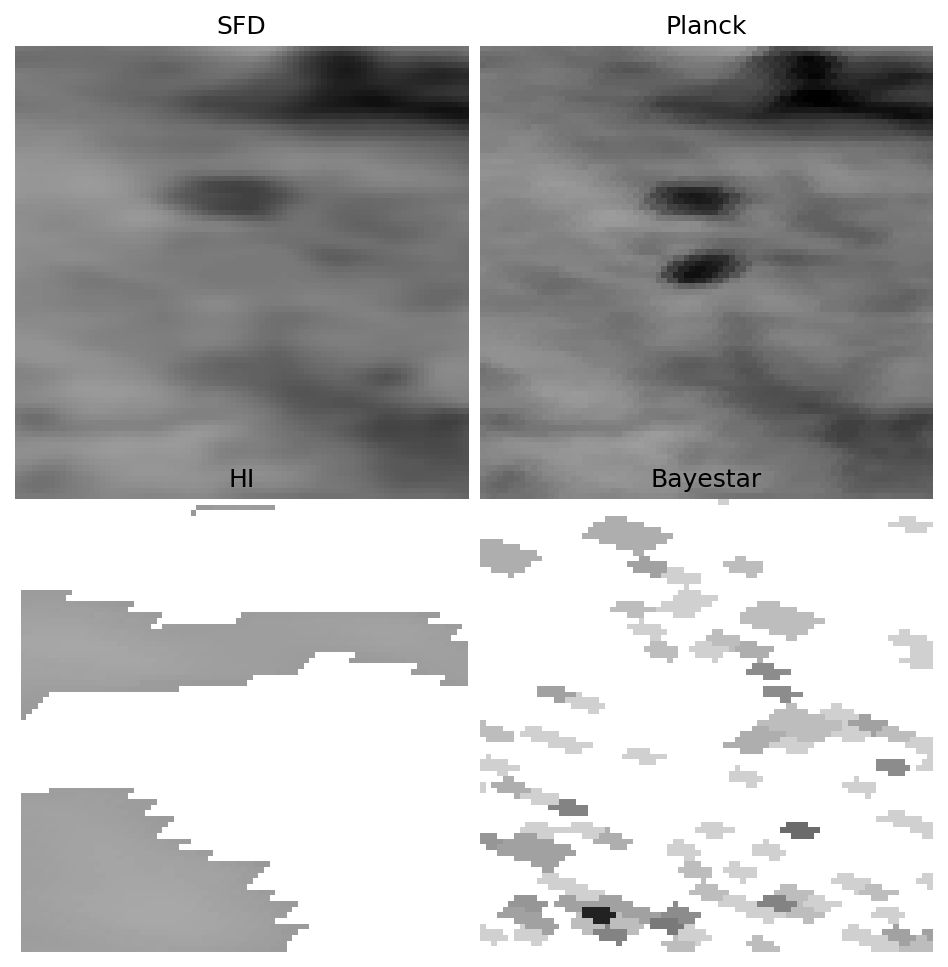

In [13]:
#fig = plt.figure(figsize=(8,8), dpi=150)

#for k,(Av,title) in enumerate([(Av_sfd, 'SFD'),
#                               (Av_planck, 'Planck'),
#                         #      (AV_HI, 'HI'),
#                               (Av_bayestar, 'Bayestar')]):
#    ax = fig.add_subplot(2,2,k+1)
fig = plt.figure(figsize=(8,8), dpi=150)

for k,(Av,title) in enumerate([(Av_sfd, 'SFD'),
                               (Av_planck, 'Planck'),
                               (Av_HI, 'HI'),
                               (Av_bayestar, 'Bayestar')]):
    ax = fig.add_subplot(2,2,k+1)
    ax.imshow(
        np.sqrt(Av)[::,::-1],
        vmin=0.,
        vmax=0.9,
        origin='lower',
        interpolation='nearest',
        cmap='binary',
        aspect='equal'
    )
    ax.axis('off')
    ax.set_title(title)

fig.subplots_adjust(wspace=0., hspace=0.)
plt.savefig(imagename, dpi=150)
